py 36 env. Don't forget to set the API key in system env.

https://www.clarifai.com/developer/quick-start/

In [1]:
from clarifai.rest import ClarifaiApp
from clarifai.rest import Image as ClImage
import requests as rq
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

def download_image(url, file_name):
    """"Convenience to download web image."""
    with open(file_name, "wb") as file:
        response = rq.get(url+file_name)
        file.write(response.content)
        print(file_name + " downloaded from " + url)
        
def list_files():
    """Convenience to list files in current directory."""
    return [f for f in os.listdir('.') if os.path.isfile(f)]


def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            api_params = json.load(fp)
    except Exception as e:
        print('Failed to load API secrets key: {}'.format(e))
        api_params = None
    return api_params['key']

3.6.3 (default, Oct  4 2017, 06:09:38) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


## API key
https://clarifai-python.readthedocs.io/en/latest/install/#configuration

api_key can be passed to the constructor (https://clarifai-python.readthedocs.io/en/latest/clarifai.rest/#clarifai.rest.client.ClarifaiApp), or set as an environment variable. 


In [2]:
API_key_filepath = 'Clarifai_API_key.json'
API_key = load_api_secrets(API_key_filepath)
API_key

'123456'

To load from desktop

In [20]:
API_key_filepath = '/Users/robincole/Desktop/Clarifai_API_key.json'
API_key = load_api_secrets(API_key_filepath)
#API_key

## Intro tutorial
Load a sample image from web and classify

In [22]:
app = ClarifaiApp(api_key=API_key)  # the constructor with api_key
#app = ClarifaiApp()  # the constructor with api_key as an environment variable

In [7]:
general_model = app.models.get('general-v1.3')
base_url = 'https://samples.clarifai.com/'

In [8]:
file_name = 'metro-north.jpg'
download_image(base_url, file_name)

metro-north.jpg downloaded from https://samples.clarifai.com/


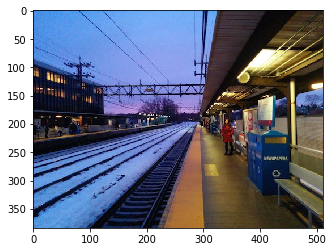

In [9]:
img = plt.imread(file_name)
plt.imshow(img)
plt.show()

In [10]:
%%time
response = general_model.predict_by_url(base_url+file_name)

CPU times: user 20.7 ms, sys: 2.25 ms, total: 22.9 ms
Wall time: 2.28 s


In [11]:
concepts = response['outputs'][0]['data']['concepts']
for concept in concepts:
    print(concept['name'], concept['value'])

train 0.9987074
railway 0.9971304
transportation system 0.99544376
locomotive 0.9914662
station 0.9910724
travel 0.98730266
subway system 0.9797999
commuter 0.9676262
traffic 0.9670719
railroad track 0.96478844
blur 0.964049
urban 0.95840275
no person 0.95792294
platform 0.957827
business 0.95676255
track 0.9446391
city 0.9392204
fast 0.93650824
road 0.9306638
terminal 0.91909647


## Hass demo

In [23]:
ls

Clarafai 28-11-2017.ipynb  face_identified.png
Clarifai_API_key.json      metro-north.jpg
demo_3.jpg


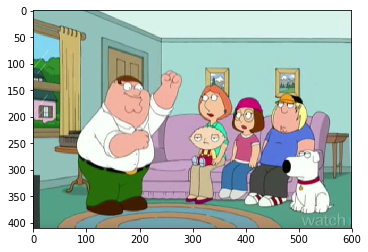

In [24]:
file_name = 'demo_3.jpg'
img = plt.imread(file_name)
plt.imshow(img)
plt.show()

In [25]:
%%time
response = general_model.predict_by_filename(filename=file_name)

CPU times: user 23 ms, sys: 4.65 ms, total: 27.7 ms
Wall time: 4.72 s


In [26]:
concepts = response['outputs'][0]['data']['concepts']
for concept in concepts:
    print(concept['name'], concept['value'])

illustration 0.99901265
sketch 0.99835825
vector 0.9949961
child 0.9938663
viral vector 0.9569653
vectors 0.94673747
fun 0.9371307
cute 0.93183243
family 0.92370546
man 0.91876805
people 0.91516846
son 0.91170335
cheerful 0.9107242
adult 0.90963054
toy 0.9083486
little 0.9080608
animal 0.90504766
happiness 0.9042769
woman 0.8944551
baby 0.8910189


### Local image & face detection
Load a local image https://clarifai-python.readthedocs.io/en/latest/tutorial/#instantiate-an-image

Face detection https://clarifai-python.readthedocs.io/en/latest/tutorial-feedback/#face-detection-model-prediction

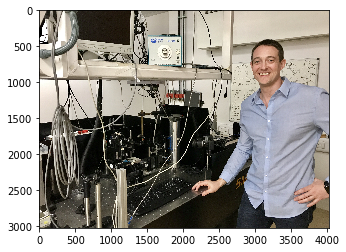

In [12]:
photos_path = '/Users/robincole/Documents/Data/photos/'
file_name = 'Robin_lab.JPG'
img = plt.imread(photos_path + file_name)
plt.imshow(img)
plt.show()

In [13]:
#Face Detection model
face_model = app.models.get('face-v1.3') # Get the face model

In [14]:
%%time
response = face_model.predict_by_filename(filename= photos_path + file_name)

CPU times: user 46.9 ms, sys: 16.7 ms, total: 63.6 ms
Wall time: 23.7 s


In [15]:
bounding_box = response['outputs'][0]['data']['regions'][0]['region_info']['bounding_box']
bounding_box

{'bottom_row': 0.3288591,
 'left_col': 0.72670805,
 'right_col': 0.8314986,
 'top_row': 0.18916923}

In [16]:
bounding_box['bottom_row']

0.3288591

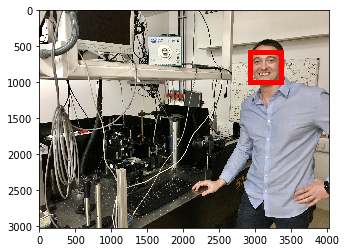

In [17]:
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Get the image rows and cols
img_rows = img.shape[0]
img_cols = img.shape[1]

x_orig = int(bounding_box['left_col']*img_cols)
y_orig = int(bounding_box['bottom_row']*img_rows)
width = int(bounding_box['right_col']*img_cols) - x_orig
height = int(bounding_box['top_row']*img_rows) - y_orig

rect = patches.Rectangle((x_orig,y_orig),width,height,linewidth=5,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.savefig('face_identified.png')
plt.show()